In [128]:
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from sklearn import svm
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.svm import LinearSVC

In [129]:
# Read data
train_data = pd.read_csv("/Users/alex/Desktop/BT4012 Project/data/6_train_dataset_augmented.csv")
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

test_data = pd.read_csv("/Users/alex/Desktop/BT4012 Project/data/4_test_dataset.csv")
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

## Training SVM model

In [130]:
# train SVM model
def train_model_svm(X_train, y_train, svm_model):

    # hyperparameter
    param_space = {
        'C': [1, 10, 100],
        'penalty': ['l1', 'l2'],
        'loss': ['hinge', 'squared_hinge'],
    }
    BayesSearchCV = RandomizedSearchCV(
        svm_model,
        param_space,
        n_iter=5,  # Number of parameter settings that are sampled
        cv=3,
        n_jobs=-1,
        scoring="recall"
,        random_state=42
    )
    # fit the Bayesian search to your data
    BayesSearchCV.fit(X_train, y_train)

    # get the best hyperparameters
    best_params = BayesSearchCV.best_params_

    # print the best hyperparameters found
    print("Best Hyperparameters:", best_params)

    # set the best hyperparameters to the model
    svm_model.set_params(**best_params)

    # train the final svm model on the entire training set
    svm_model.fit(X_train, y_train)

In [131]:
def evaluate_model(model, predX, predY):

    y_pred = model.predict(predX)

    # accuracy
    acc =  accuracy_score(predY, y_pred)
    print("Accuracy: %.2f%%" % (acc * 100))

    # precision
    precision = precision_score(predY, y_pred)
    print("Precision: %.2f%%" % (precision* 100))

    # recall
    recall = recall_score(predY, y_pred)
    print("Recall: %.2f%%" % (recall*100))

    # f1 Score
    f1 = f1_score(predY, y_pred)
    print("F1 Score: %.2f%%" % (f1*100))

    # ROC-AUC score
    roc_auc = roc_auc_score(predY, y_pred)
    print("ROC-AUC Score: %.2f%%" % (roc_auc*100))

In [132]:
# create the SVM model
svm_model = LinearSVC()

# train model
train_model_svm(X_train,y_train, svm_model)

/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/a

Best Hyperparameters: {'penalty': 'l2', 'loss': 'hinge', 'C': 10}


/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [133]:
evaluate_model(svm_model,X_test, y_test)

Accuracy: 65.22%
Precision: 33.45%
Recall: 57.22%
F1 Score: 42.22%
ROC-AUC Score: 62.36%


In [148]:
# create the SVM model v2 
svm_model2 = LinearSVC(random_state=0, C=1)
svm_model2 .fit(X_train, y_train) 



/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alex/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, random_state=0)

In [149]:
evaluate_model(svm_model2,X_test, y_test)

Accuracy: 49.33%
Precision: 29.60%
Recall: 93.00%
F1 Score: 44.91%
ROC-AUC Score: 64.93%


## Permutation Importance 

In [150]:
r = permutation_importance(svm_model2, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

In [151]:
# Get permutation importances
importances = r.importances_mean

# Create a DataFrame to display feature importances
permutation_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Permutation_Importance_Mean': importances,
})

# Rank features based on importances mean value in descending order
ranked_features = permutation_importance_df.sort_values(by='Permutation_Importance_Mean', ascending=False)

# Display the ranked features
print("Ranked Features based on Permutation Importance Mean:")
print(ranked_features)

Ranked Features based on Permutation Importance Mean:
                                     Feature  Permutation_Importance_Mean
14                            has_sent_ERC20                     0.081182
13                total_value_received_ratio                     0.075885
12             first_and_last_txns_time_diff                     0.032255
1                         total_transactions                     0.018088
20                      ERC20_max_value_sent                     0.015347
9                         max_value_received                     0.013123
18                avg_time_between_sent_txns                     0.011603
8                  num_unique_senders_to_acc                     0.008616
7       ERC20_num_unique_recipients_from_acc                     0.007920
10                      total_ether_received                     0.007283
3                     total_value_sent_ratio                     0.006935
15                            max_value_sent              

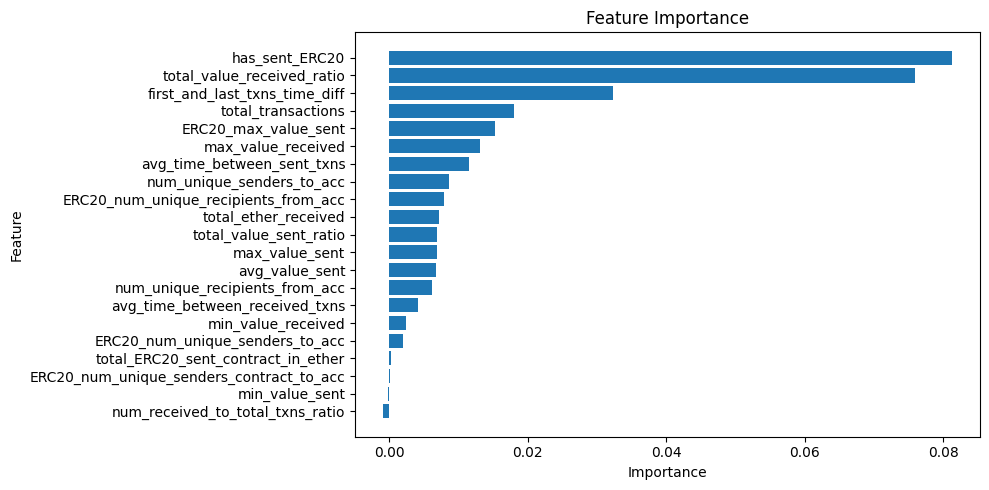

In [152]:
plt.figure(figsize=(10, 5))
plt.style.use('default')
plt.barh(ranked_features['Feature'], ranked_features['Permutation_Importance_Mean'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()